In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Traditional A/B testing

2 things affect our confidence of an estimate: <br/>
1. how spread out the samples are (more variance -> data is more spread out -> less confident)
2. how many samples there are (more samples -> more confident)

If we take a look at the confidence interval formula, these rules are pretty obvious
$$\text{95% confidence interval}=\bigg[\hat{\mu}-1.96\frac{\hat{\sigma}}{\sqrt{N}},\hat{\mu}+1.96\frac{\hat{\sigma}}{\sqrt{N}}\bigg]$$

the **larger the standard deviation** is, the **wider** the interval is, the **less confident** we become in our estimate <br/>
the **larger the sample** is, the **narrower** the interval is,  the **more confident** we become in our estimate

mean of $\hat{\mu}$ is $\mu$, $E(\hat{\mu})=\mu$

**Central Limit Theorem**

Based on the Bayesian point of view, we're trying to find the distribution of the mean from the distribution of the datapoints. If the datapoints are normally distributed random variables, then because of probability theory, the mean should also be normally distributed random variables. But because of the central limit theorem, sum of all random variables will converge to normal distribution no matter what the distribution of the random variable is.




In [150]:
random_variables = list(np.random.rand(25))
random_variables.sort()
random_variables = pd.Series(random_variables)

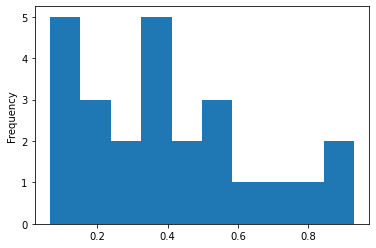

In [151]:
random_variables.plot.hist()


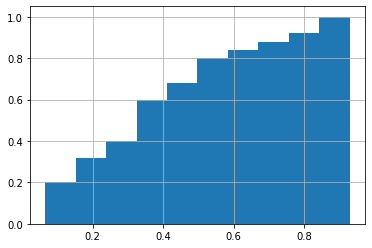

In [152]:
random_variables.hist(cumulative=True, density=1)

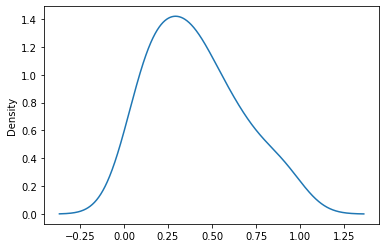

In [153]:
random_variables.plot.density()


In [154]:
df = pd.DataFrame()
df['random_variables'] = random_variables
df['bin'] = pd.cut(df['random_variables'],bins=5)
df


,random_variables,bin
0,0.065717,"(0.0649, 0.239]"
1,0.102432,"(0.0649, 0.239]"
2,0.102966,"(0.0649, 0.239]"
3,0.106189,"(0.0649, 0.239]"
4,0.150258,"(0.0649, 0.239]"
5,0.172806,"(0.0649, 0.239]"
6,0.219561,"(0.0649, 0.239]"
7,0.221233,"(0.0649, 0.239]"
8,0.251128,"(0.239, 0.411]"
9,0.293114,"(0.239, 0.411]"


In [155]:
df_density = df.groupby(['bin']).count()['random_variables'].reset_index()
df_density = df_density.rename(columns={'random_variables':'count'})
df_density['density'] = df_density['count']/df_density['count'].sum()
df_density['left_interval'] =df_density['bin'].apply(lambda row: row.left)
df_density['right_interval'] = df_density['bin'].apply(lambda row: row.right)
df_density

,bin,count,density,left_interval,right_interval
0,"(0.0649, 0.239]",8,0.32,0.0649,0.239
1,"(0.239, 0.411]",7,0.28,0.2390,0.411
2,"(0.411, 0.584]",5,0.20,0.4110,0.584
3,"(0.584, 0.757]",2,0.08,0.5840,0.757
4,"(0.757, 0.93]",3,0.12,0.7570,0.930


In [156]:
df_merge = pd.merge(left=df,right=df_density,how='left',on='bin')
df_merge

,random_variables,bin,count,density,left_interval,right_interval
0,0.065717,"(0.0649, 0.239]",8,0.32,0.0649,0.239
1,0.102432,"(0.0649, 0.239]",8,0.32,0.0649,0.239
2,0.102966,"(0.0649, 0.239]",8,0.32,0.0649,0.239
3,0.106189,"(0.0649, 0.239]",8,0.32,0.0649,0.239
4,0.150258,"(0.0649, 0.239]",8,0.32,0.0649,0.239
5,0.172806,"(0.0649, 0.239]",8,0.32,0.0649,0.239
6,0.219561,"(0.0649, 0.239]",8,0.32,0.0649,0.239
7,0.221233,"(0.0649, 0.239]",8,0.32,0.0649,0.239
8,0.251128,"(0.239, 0.411]",7,0.28,0.2390,0.411
9,0.293114,"(0.239, 0.411]",7,0.28,0.2390,0.411


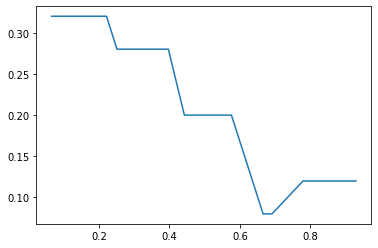

In [157]:
plt.plot(df_merge['random_variables'],df_merge['density'])
plt.show()

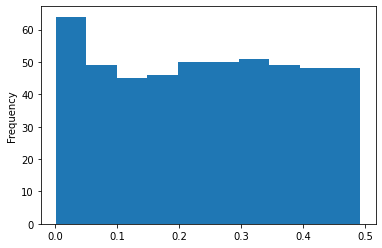

In [72]:
df['density'].plot.hist()

In [79]:
df['bin'].plot.hist()

TypeError: no numeric data to plot